# Data analysis
In this notebook, we will analyze key features of the data

In [33]:
%matplotlib inline
import numpy as np
from implementations import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from helper import load_csv_data
from processing import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import of the data

In [34]:
y_train, x_train, id_train = load_csv_data("../data/train.csv")
print(x_train.shape, y_train.shape)

(250000, 30) (250000,)


In [71]:
features = np.genfromtxt("../data/train.csv",
              delimiter=',',
              encoding='UTF-8-sig',
              dtype=None,
              names=True).dtype.names[2:]

In [72]:
print(var_names)

('DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt')


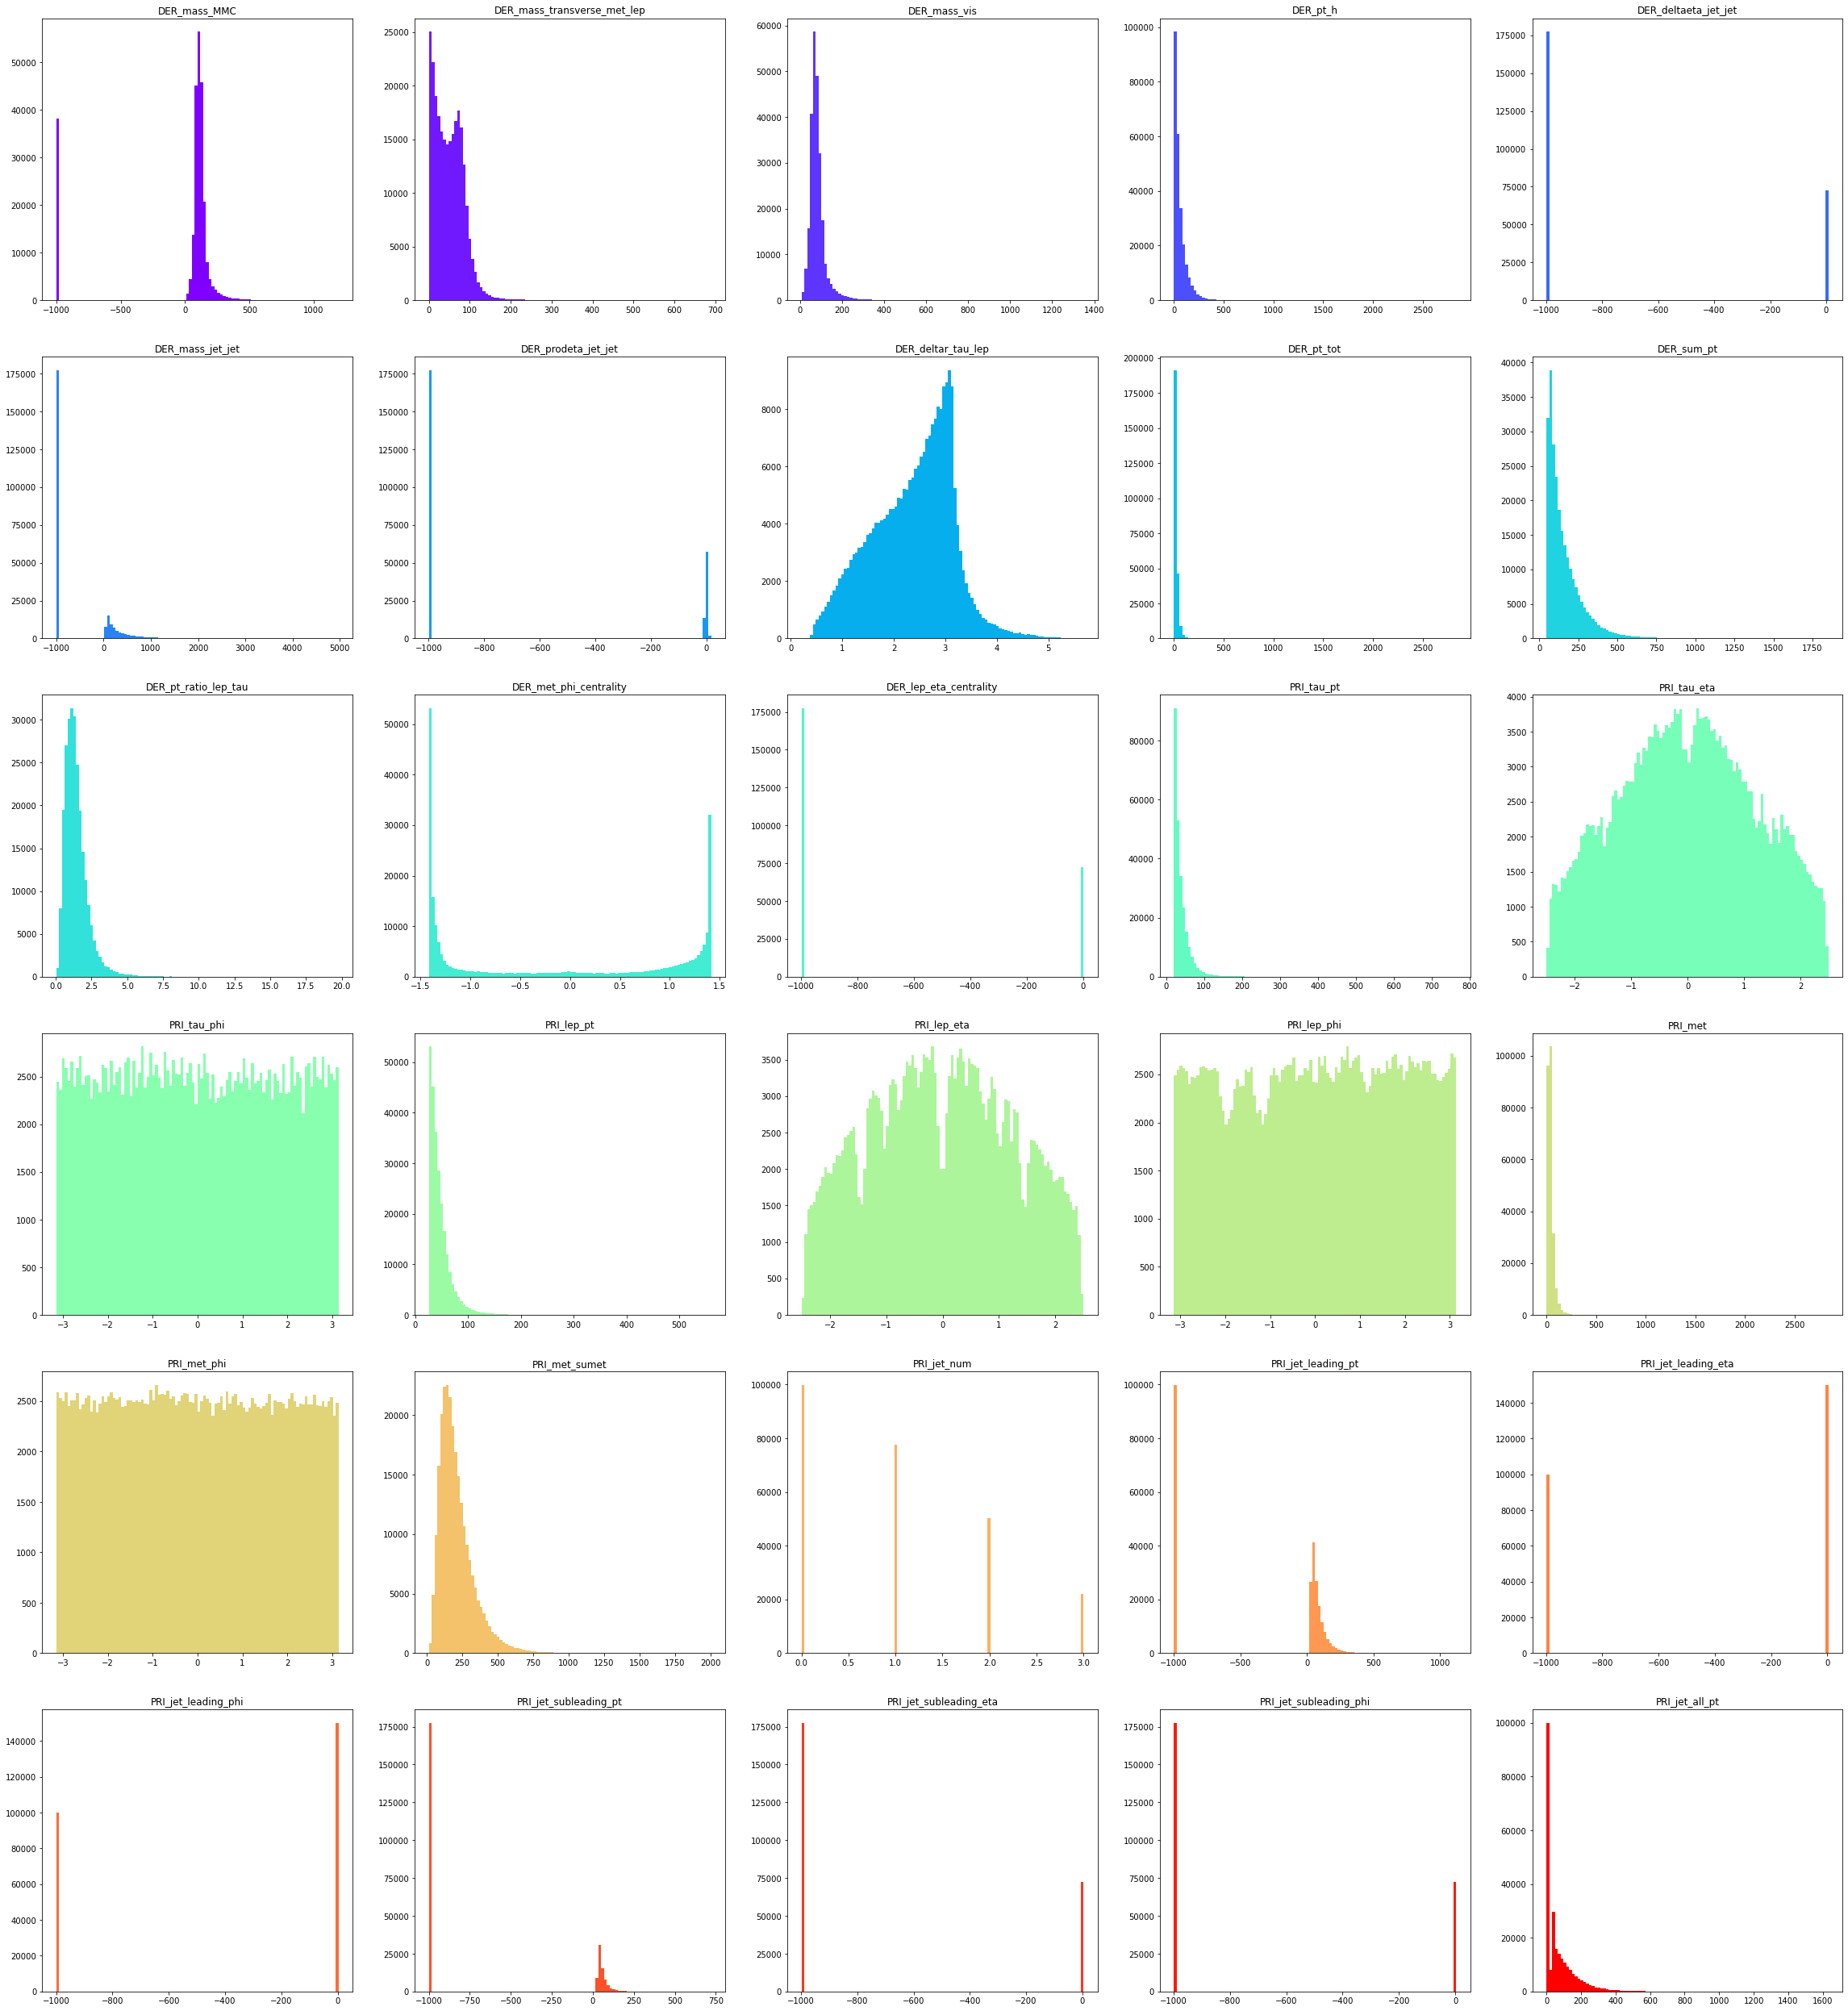

In [8]:
fig, axs = plt.subplots(6, 5, figsize=(40,45))
axs = axs.flatten()

color_map = plt.cm.rainbow(np.linspace(0, 1, x_train.shape[1]))
for i, variable in enumerate(x_train.T):
   axs[i].hist(variable, bins=100, color=color_map[i])
   axs[i].set_title(features[i])

We can see on the histograms that for many features, we have outliers. Therefore, we will deal with them in order to have better data analysis. Especially values that have a value of -999.

In [36]:
x_train = clean_data(x_train)

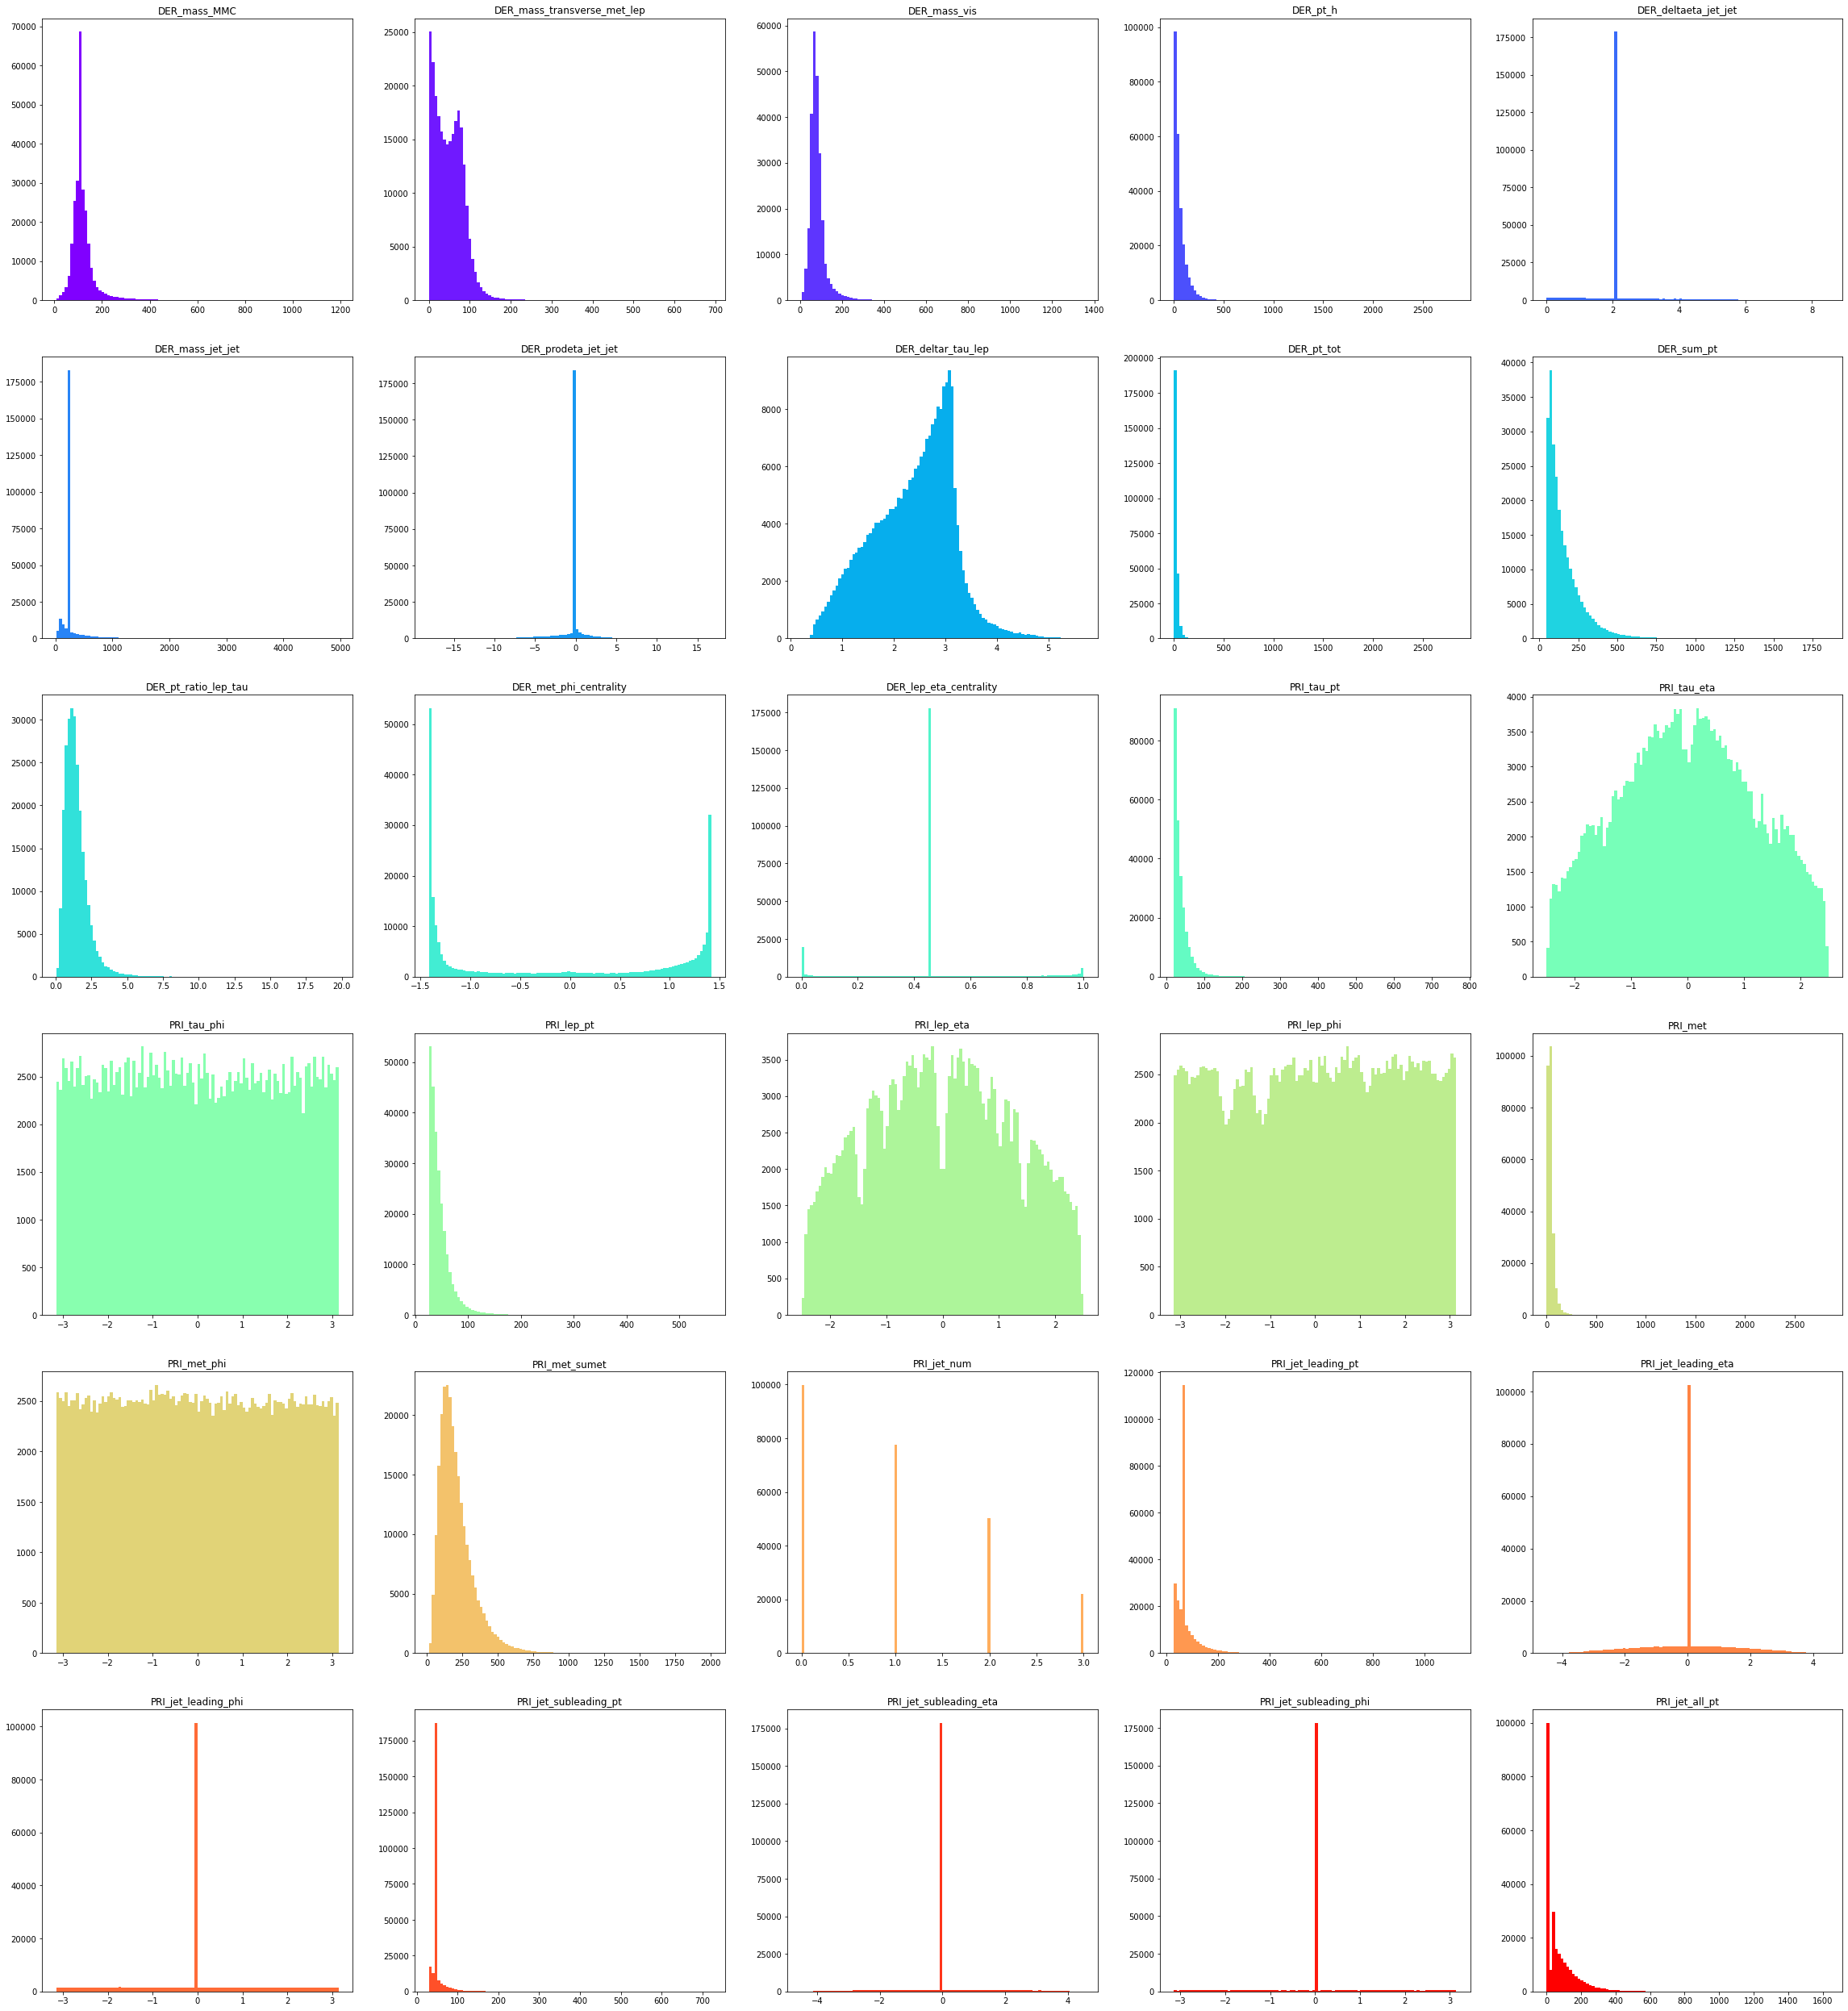

In [37]:
fig, axs = plt.subplots(6, 5, figsize=(40,45))
axs = axs.flatten()

color_map = plt.cm.rainbow(np.linspace(0, 1, x_train.shape[1]))
for i, variable in enumerate(x_train.T):
   axs[i].hist(variable, bins=100, color=color_map[i])
   axs[i].set_title(features[i])

To smooth the curves and understand better the data, we will use a logarithmic histogram.

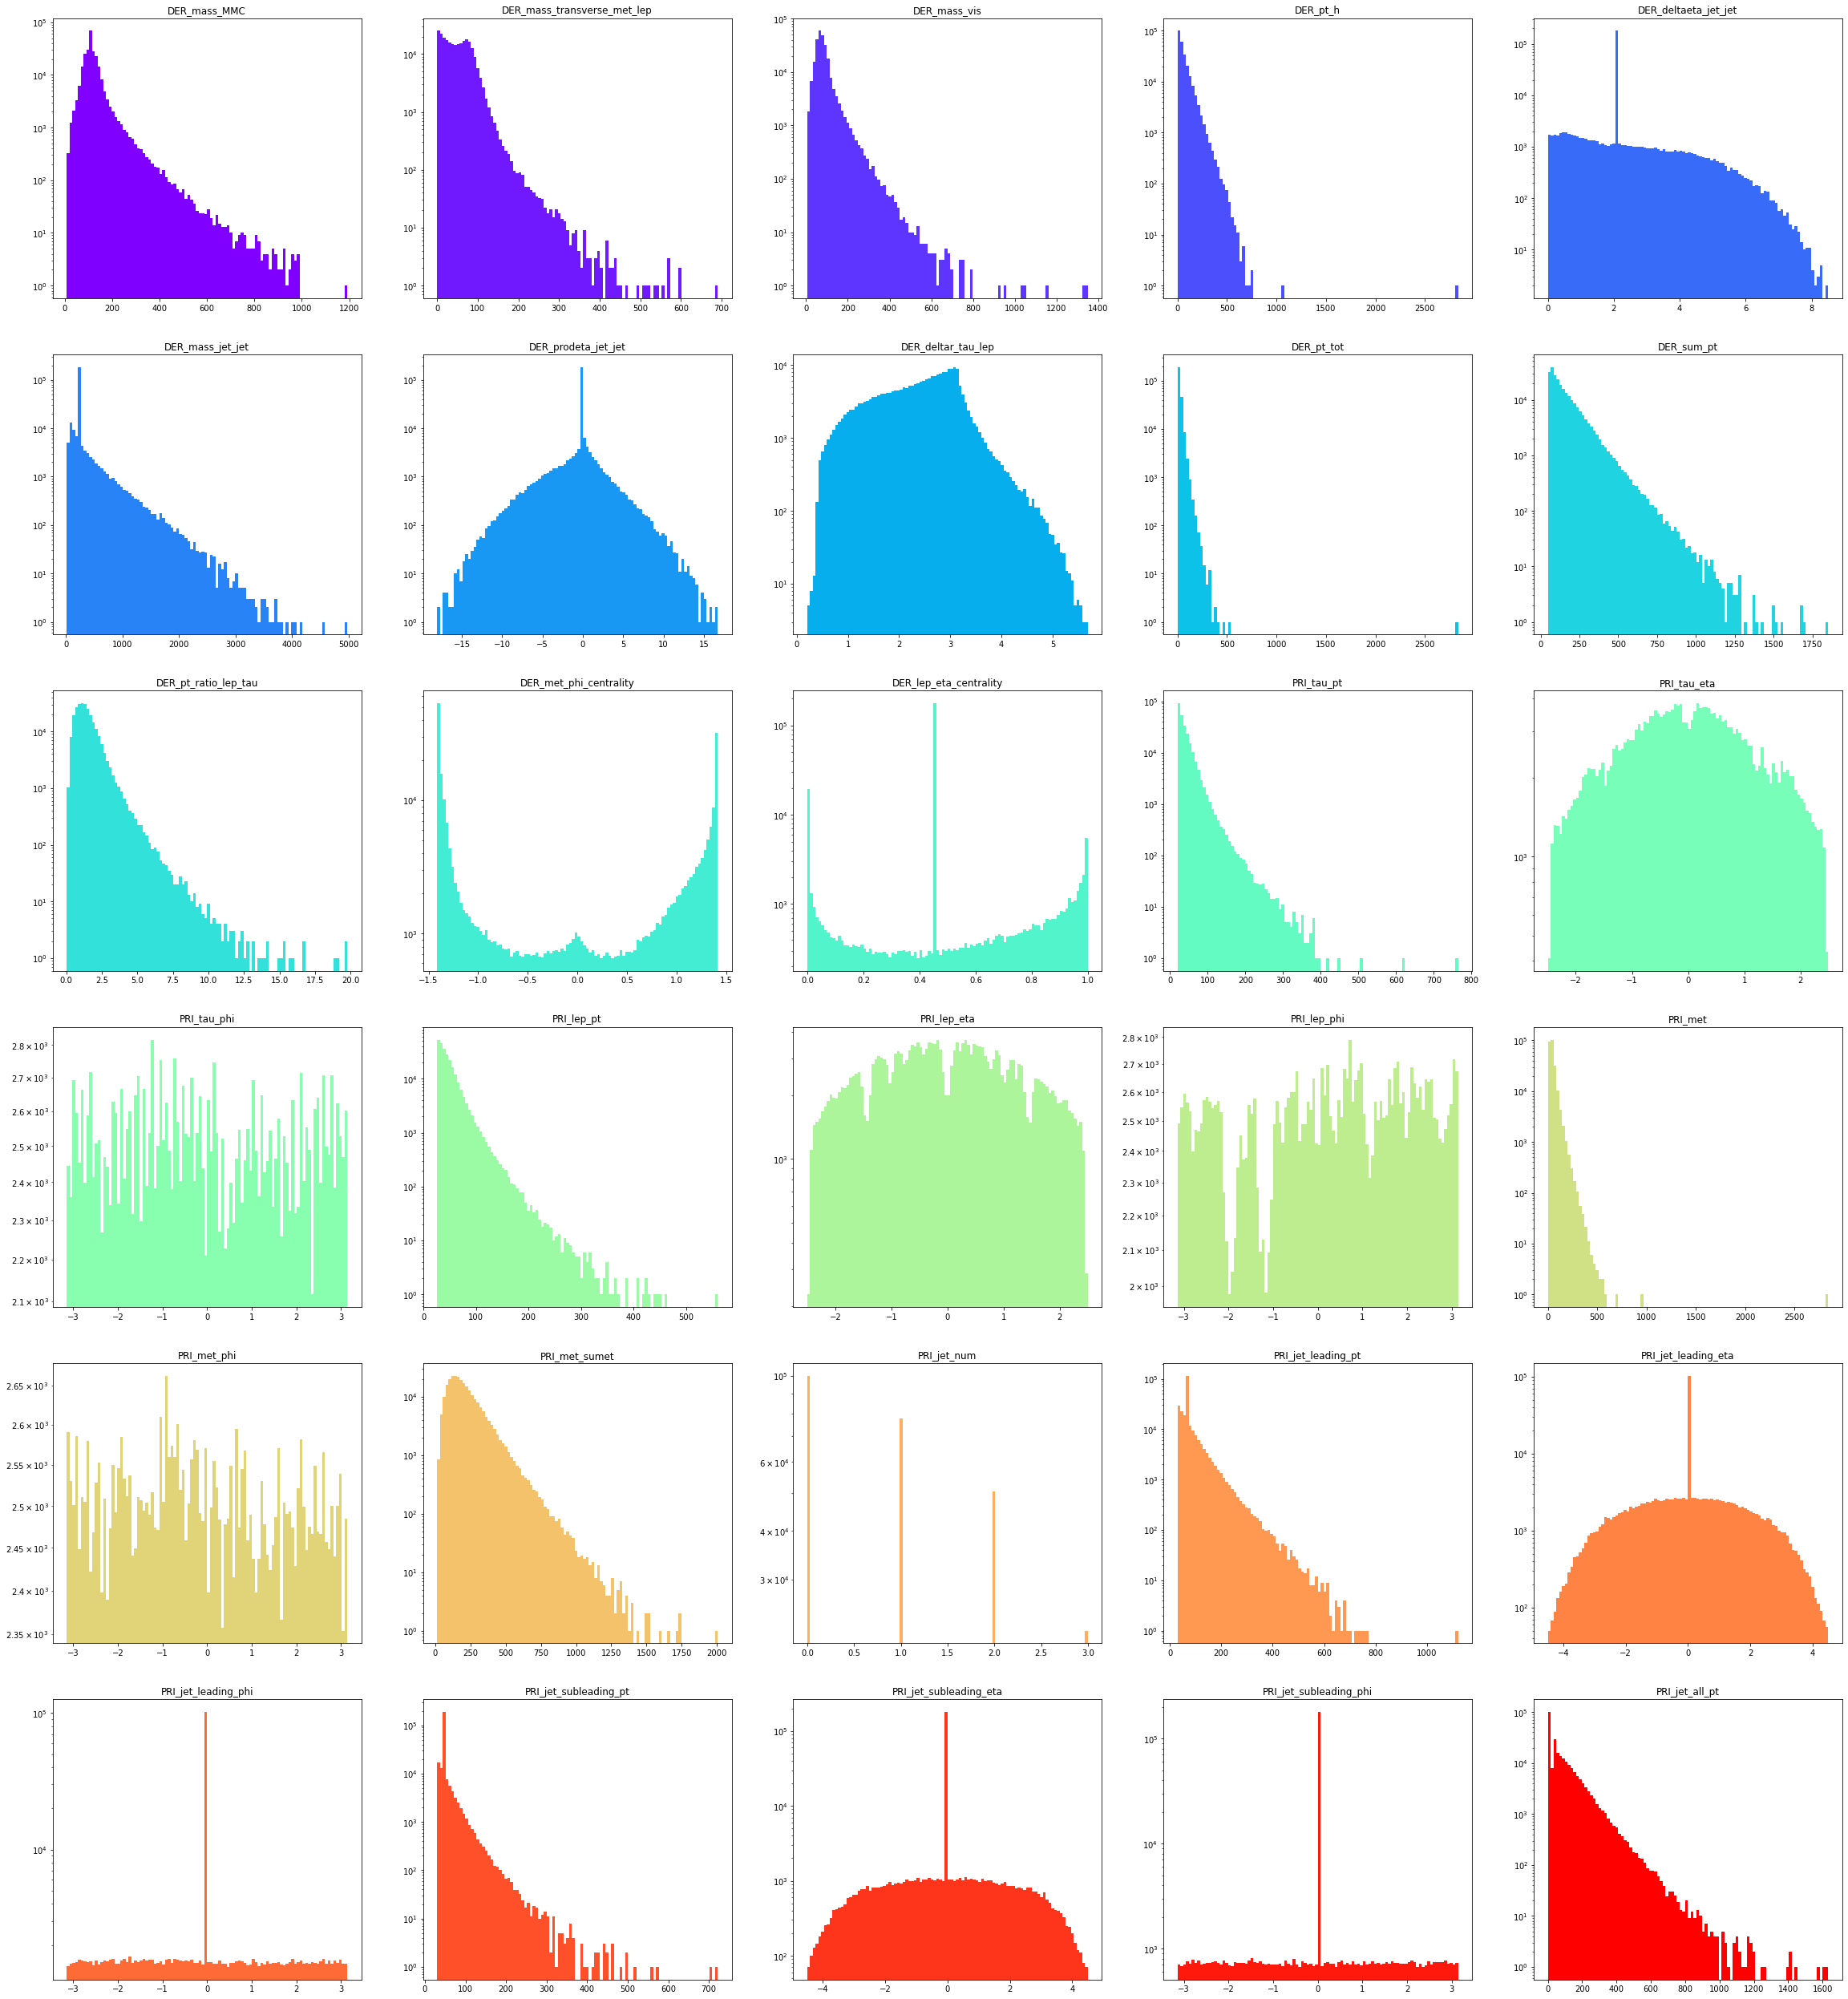

In [38]:
fig, axs = plt.subplots(6, 5, figsize=(40,45))
axs = axs.flatten()

color_map = plt.cm.rainbow(np.linspace(0, 1, x_train.shape[1]))
for i, variable in enumerate(x_train.T):
   axs[i].hist(variable, bins=100, log=True, color=color_map[i])
   axs[i].set_title(features[i])

We can see in the graphs that some features are equally distributed or have some gaussian curves. Others have a huge number of values that are the same. 

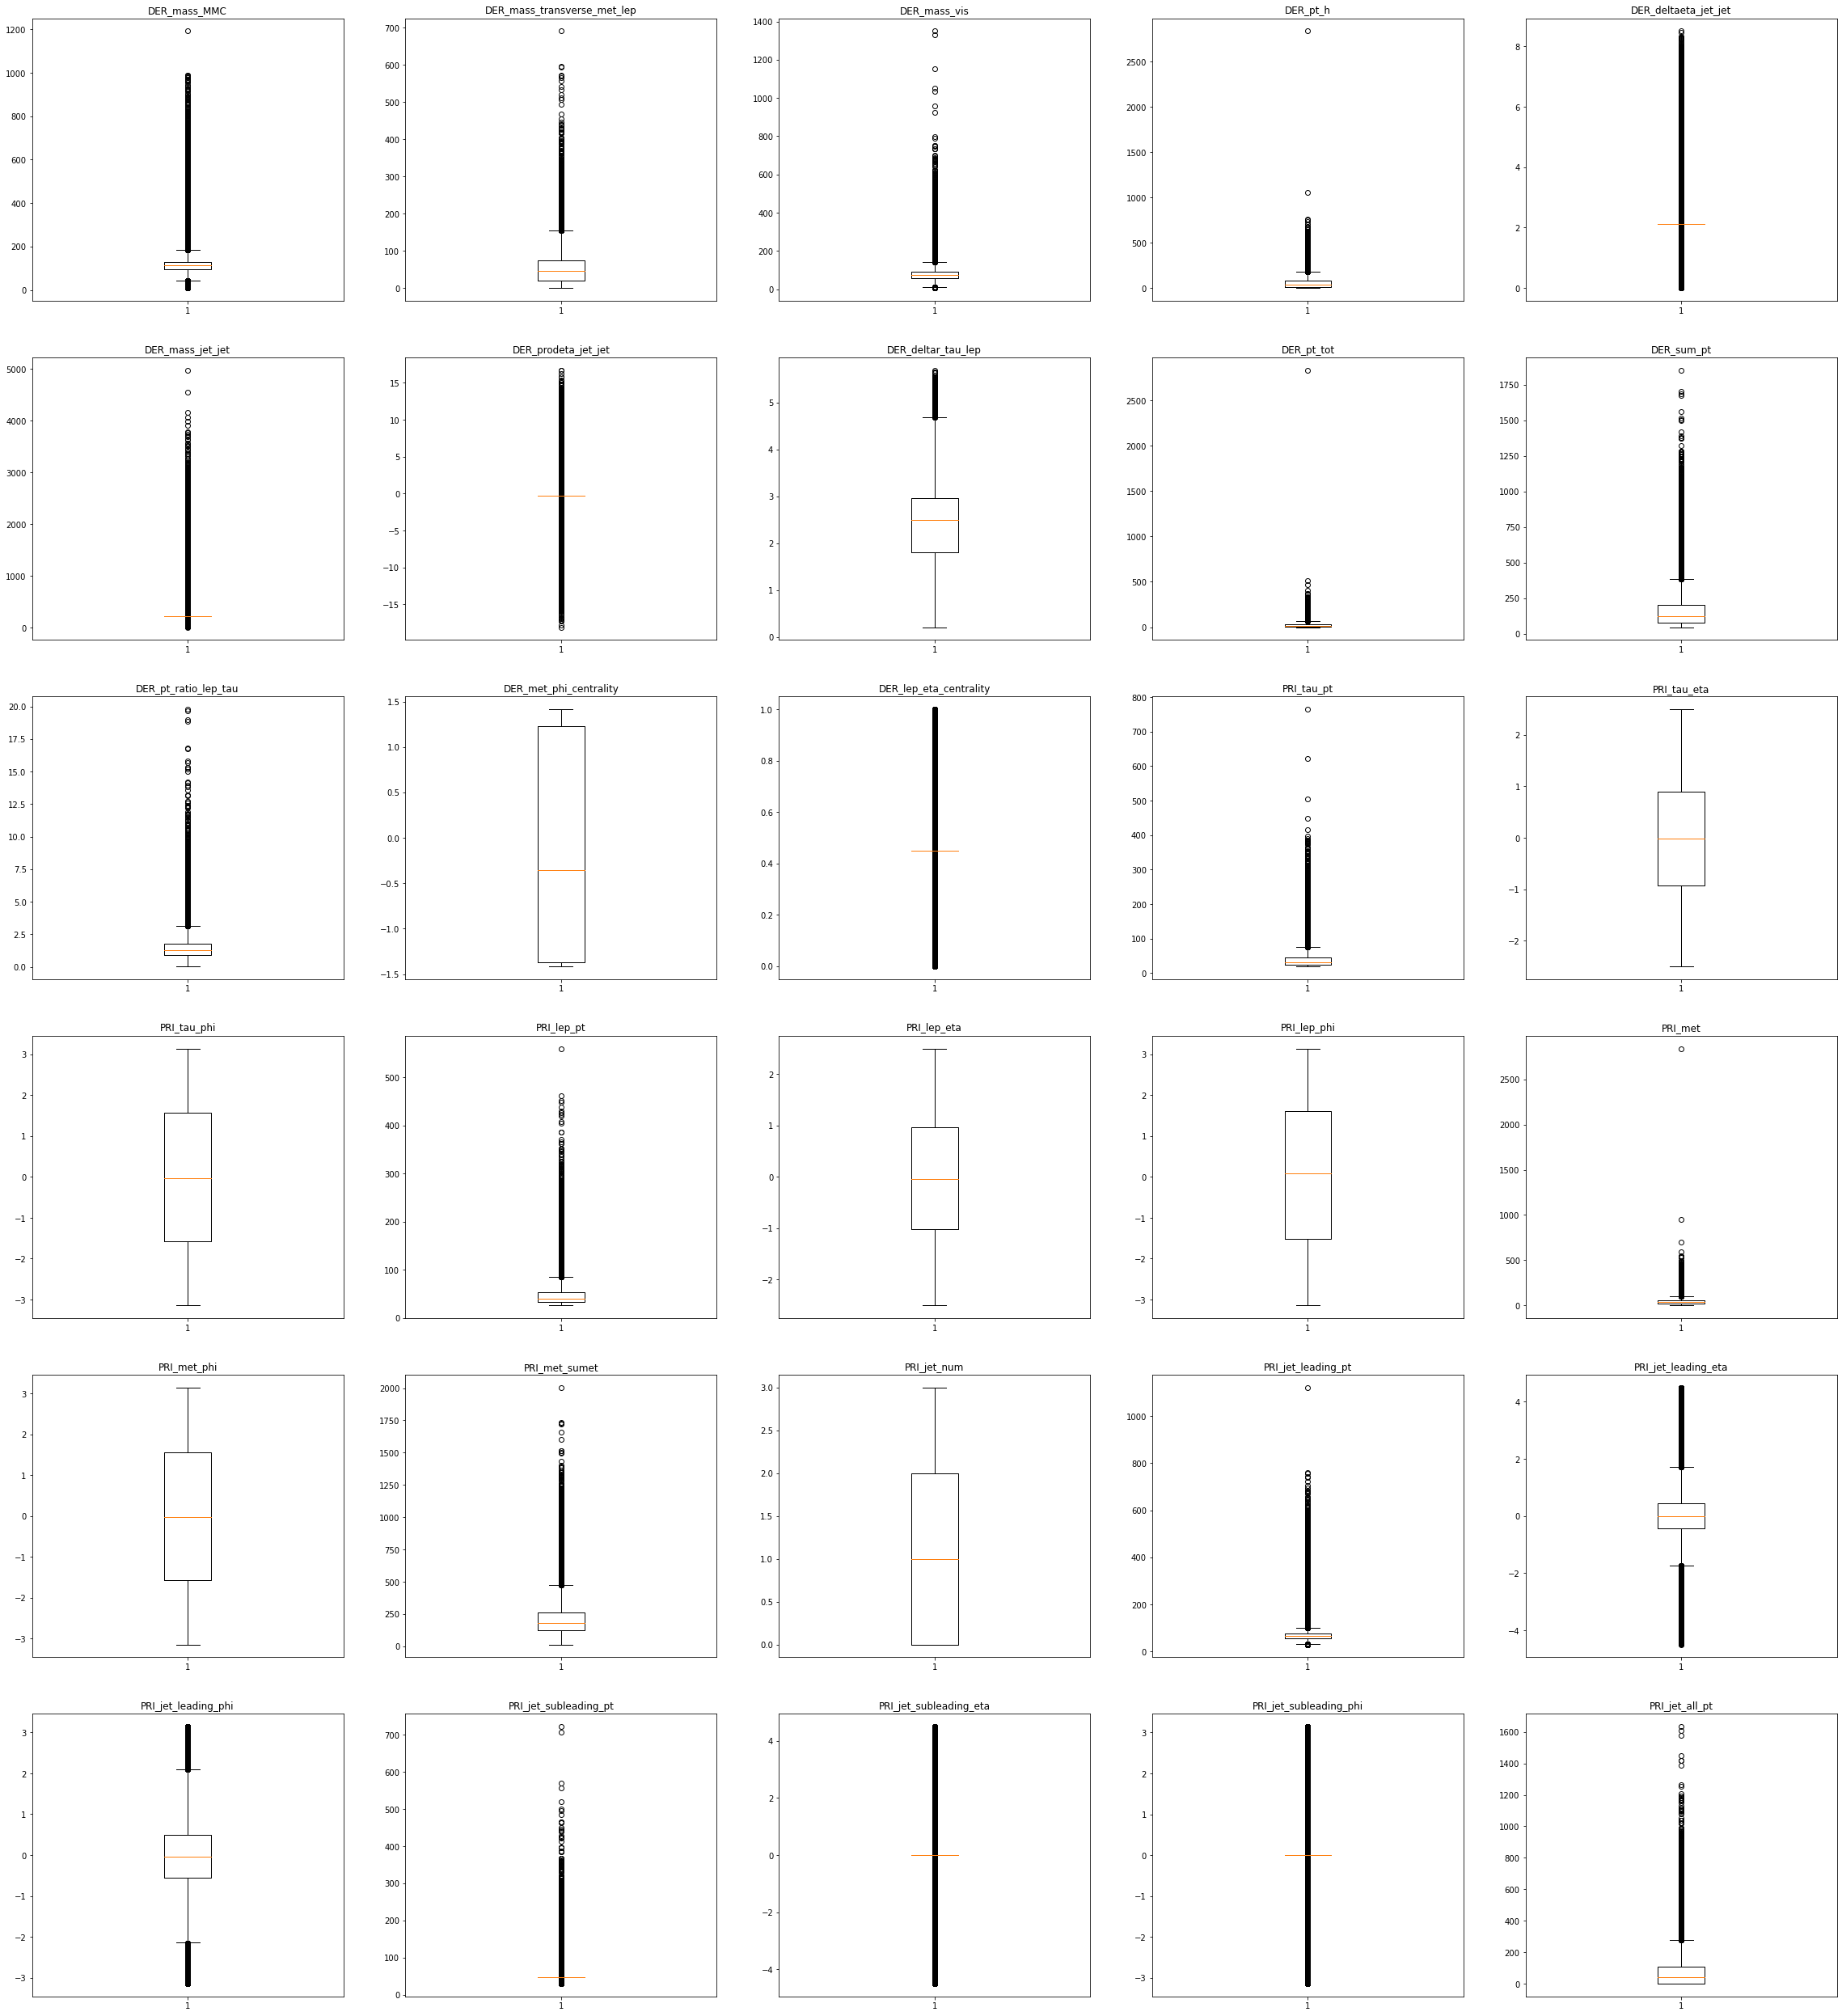

In [39]:
fig, axs = plt.subplots(6, 5, figsize=(40,45))
axs = axs.flatten()

color_map = plt.cm.rainbow(np.linspace(0, 1, x_train.shape[1]))
for i, variable in enumerate(x_train.T):
   axs[i].boxplot(variable)
   axs[i].set_title(features[i])

Thanks to those boxplots

In [48]:
quartiles = np.ndarray([len(features), 2])

for i, variable in enumerate(x_train.T):
    quartiles[i] = np.quantile(variable, [0.25,0.75]) 

print(quartiles)

[[ 9.5665000e+01  1.3060625e+02]
 [ 1.9241000e+01  7.3598000e+01]
 [ 5.9388750e+01  9.2259000e+01]
 [ 1.4068750e+01  7.9169000e+01]
 [ 2.1100000e+00  2.1100000e+00]
 [ 2.2588000e+02  2.2588000e+02]
 [-2.4000000e-01 -2.4000000e-01]
 [ 1.8100000e+00  2.9610000e+00]
 [ 2.8410000e+00  2.7591000e+01]
 [ 7.7550000e+01  2.0047825e+02]
 [ 8.8300000e-01  1.7770000e+00]
 [-1.3710000e+00  1.2250000e+00]
 [ 4.5000000e-01  4.5000000e-01]
 [ 2.4591750e+01  4.5017000e+01]
 [-9.2500000e-01  8.9800000e-01]
 [-1.5750000e+00  1.5650000e+00]
 [ 3.2375000e+01  5.3390000e+01]
 [-1.0140000e+00  9.5900000e-01]
 [-1.5220000e+00  1.6180000e+00]
 [ 2.1398000e+01  5.1895000e+01]
 [-1.5750000e+00  1.5610000e+00]
 [ 1.2301750e+02  2.6337925e+02]
 [ 0.0000000e+00  2.0000000e+00]
 [ 5.7439000e+01  7.5349000e+01]
 [-4.3300000e-01  4.3300000e-01]
 [-5.5600000e-01  5.0300000e-01]
 [ 4.7900000e+01  4.7900000e+01]
 [-1.0000000e-02 -1.0000000e-02]
 [-0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  1.0993375e+02]]


In [50]:
medians = np.ndarray([len(features), 1])
for i, variable in enumerate(x_train.T):
    medians[i] = np.median(variable) 
print(means)

[[ 1.124100e+02]
 [ 4.652400e+01]
 [ 7.375200e+01]
 [ 3.846750e+01]
 [ 2.110000e+00]
 [ 2.258800e+02]
 [-2.400000e-01]
 [ 2.491500e+00]
 [ 1.231550e+01]
 [ 1.206645e+02]
 [ 1.280000e+00]
 [-3.560000e-01]
 [ 4.500000e-01]
 [ 3.180400e+01]
 [-2.300000e-02]
 [-3.300000e-02]
 [ 4.051600e+01]
 [-4.500000e-02]
 [ 8.600000e-02]
 [ 3.480200e+01]
 [-2.400000e-02]
 [ 1.797390e+02]
 [ 1.000000e+00]
 [ 6.556000e+01]
 [ 0.000000e+00]
 [-3.000000e-02]
 [ 4.790000e+01]
 [-1.000000e-02]
 [ 0.000000e+00]
 [ 4.051250e+01]]


In [52]:
inter_q = [x[1]-x[0] for x in quartiles]
print(inter_q)

[34.94124999999998, 54.357, 32.87025, 65.10024999999999, 0.0, 0.0, 0.0, 1.1509999999999998, 24.75, 122.92825, 0.8939999999999999, 2.596, 0.0, 20.425250000000005, 1.823, 3.1399999999999997, 21.015, 1.9729999999999999, 3.14, 30.497000000000003, 3.136, 140.36175000000003, 2.0, 17.910000000000004, 0.866, 1.0590000000000002, 0.0, 0.0, 0.0, 109.93375]


In [92]:
upper_bound = [x[1]*1.5 for x in quartiles]
lower_bound = [x[0] * 1.5 for x in quartiles]
print(upper_bound)

[195.90937499999998, 110.39699999999999, 138.3885, 118.7535, 3.165, 338.82, -0.36, 4.4415, 41.3865, 300.717375, 2.6654999999999998, 1.8375000000000001, 0.675, 67.52550000000001, 1.347, 2.3475, 80.08500000000001, 1.4385, 2.427, 77.8425, 2.3415, 395.06887500000005, 3.0, 113.02350000000001, 0.6495, 0.7545, 71.85, -0.015, 0.0, 164.900625]


In [88]:
#clean_data(x_train, upper_bound)
pri_jet_num_index = features.index('PRI_jet_num')
for i, variable in enumerate(x_train.T):
        # replace outlier with variables mode.
        if(pri_jet_num_index == i):
            continue
        # cap outliers. (by given quantile - variable "cap")
        u_capped_value = upper_bound[i]
        l_capped_value = lower_bound[i]
        variable = np.where(variable < u_capped_value, variable, u_capped_value)
        variable = np.where(l_capped_value < variable, variable, l_capped_value)

        x_train.T[i] = variable


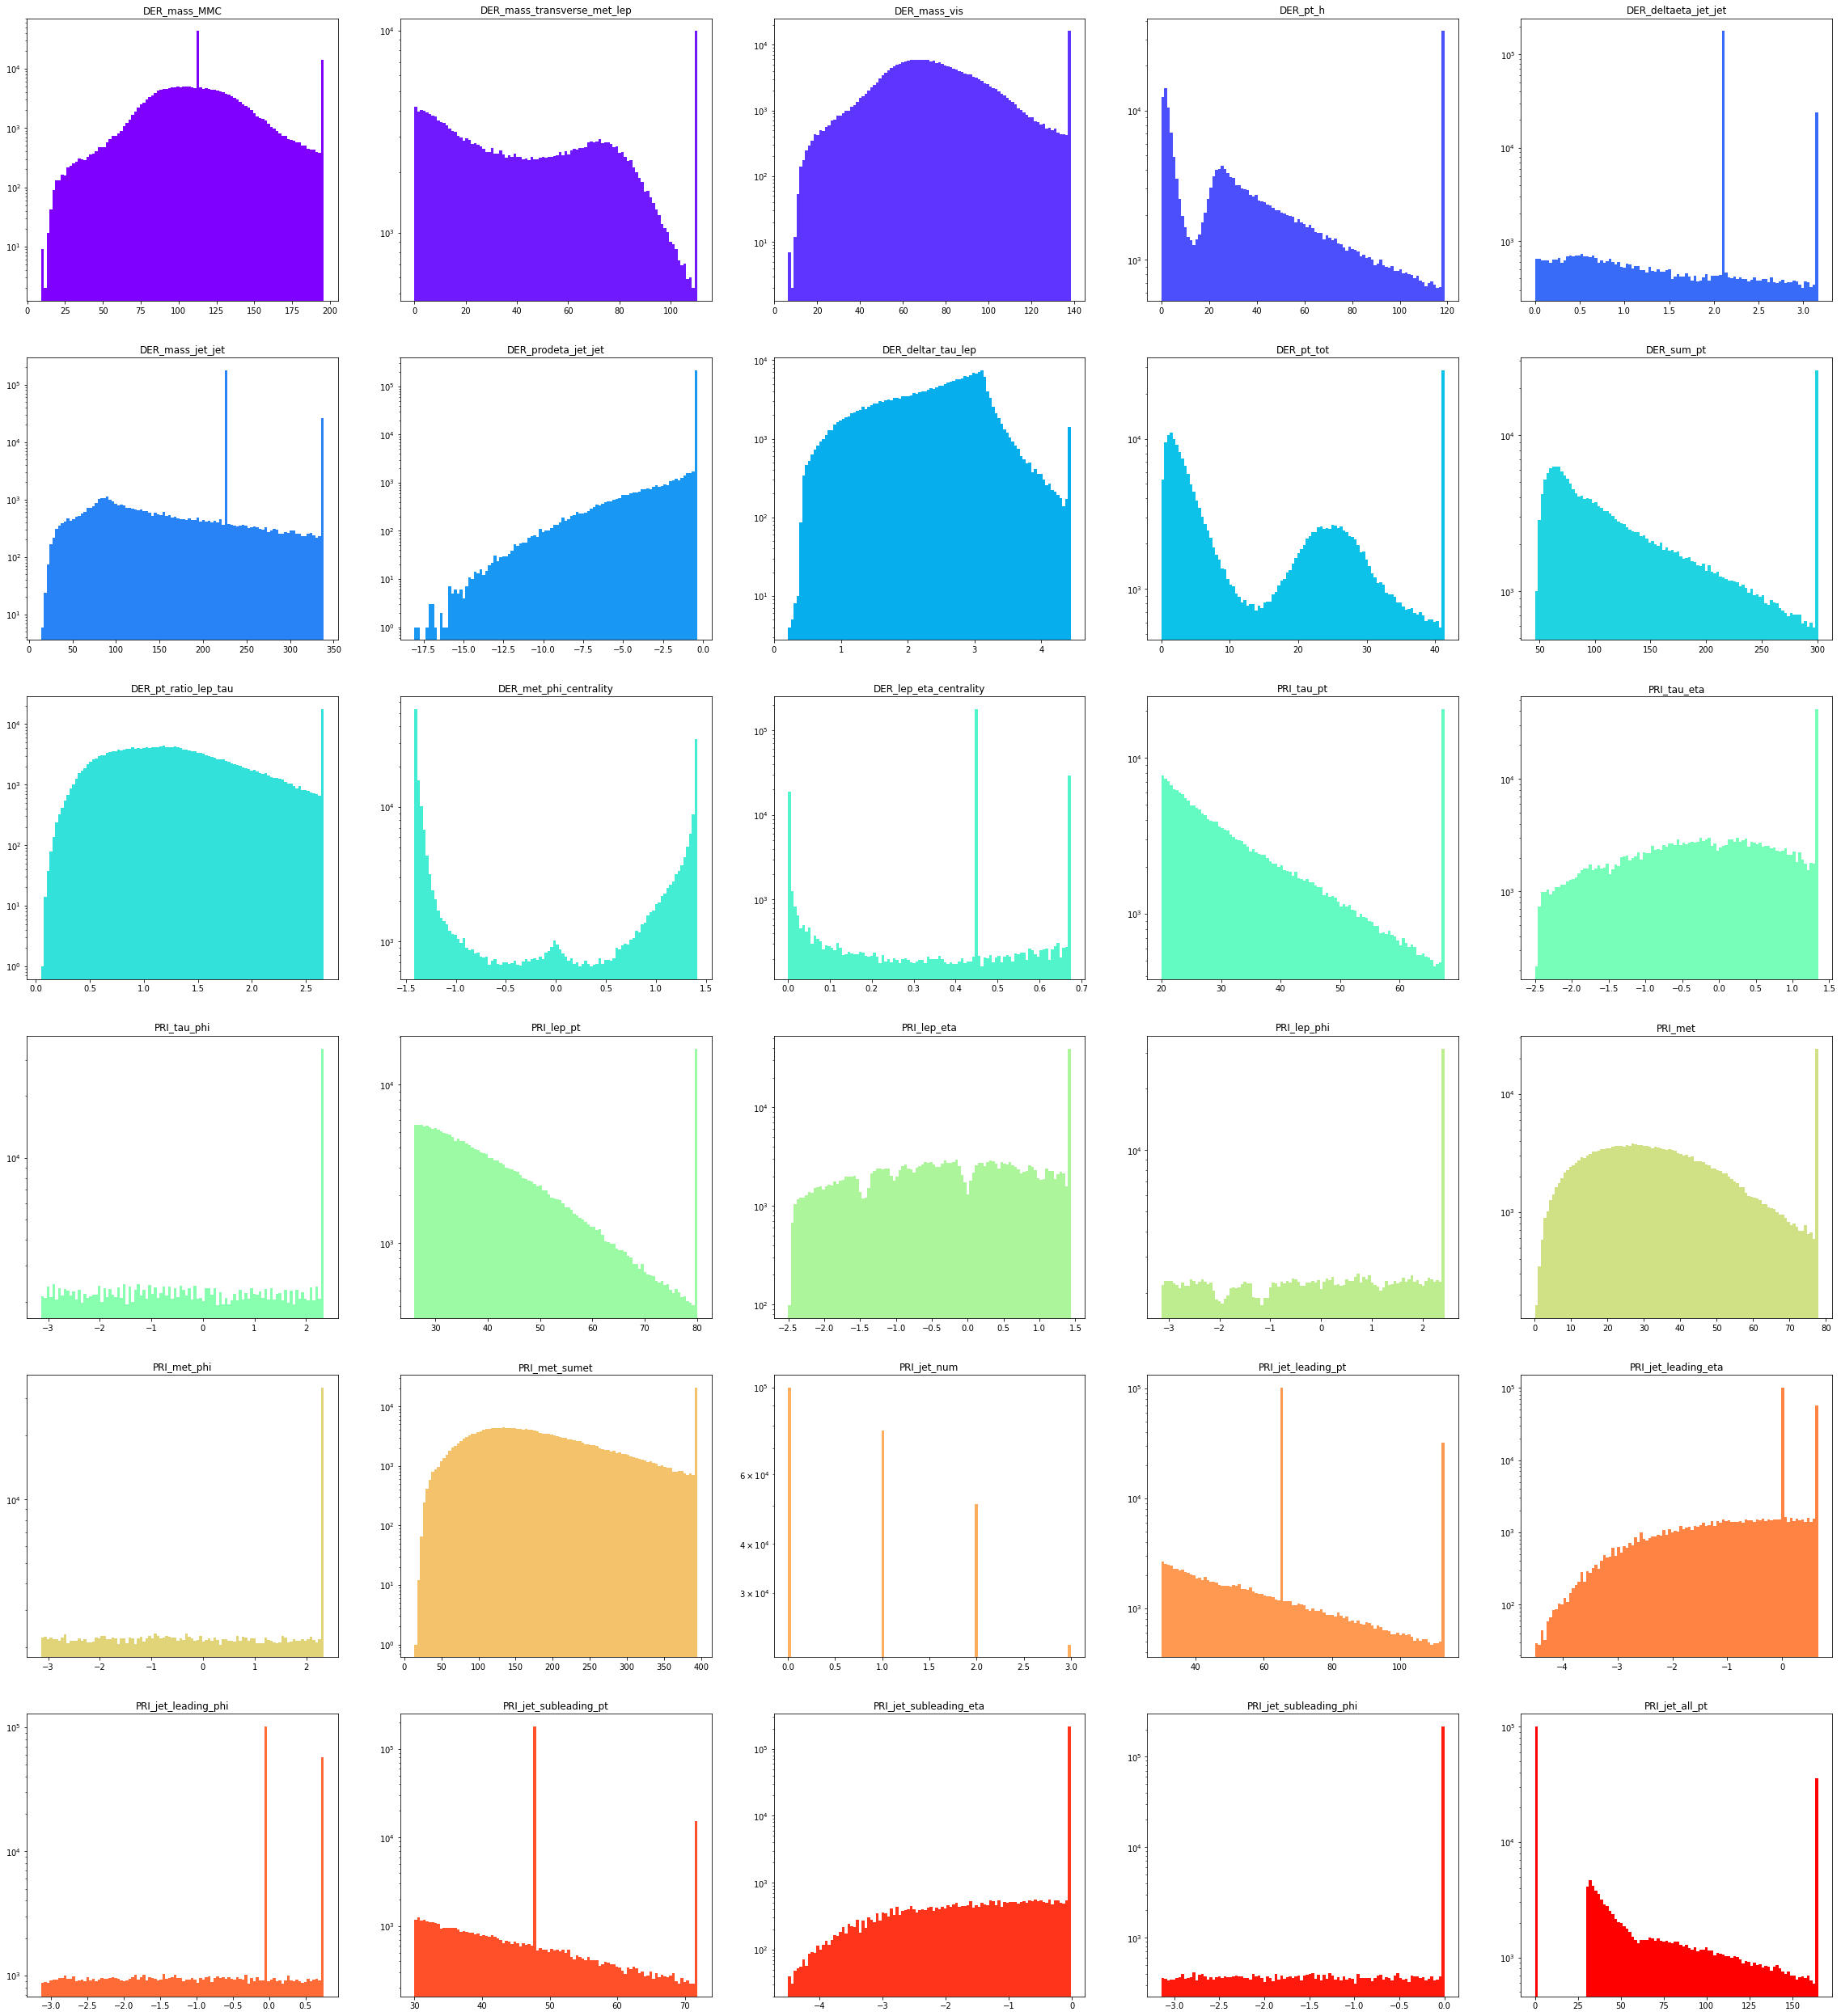

In [90]:
fig, axs = plt.subplots(6, 5, figsize=(40,45))
axs = axs.flatten()

color_map = plt.cm.rainbow(np.linspace(0, 1, x_train.shape[1]))
for i, variable in enumerate(x_train.T):
   #print(max(variable)) 
   axs[i].hist(variable, bins=100, log=True, color=color_map[i])
   axs[i].set_title(features[i])

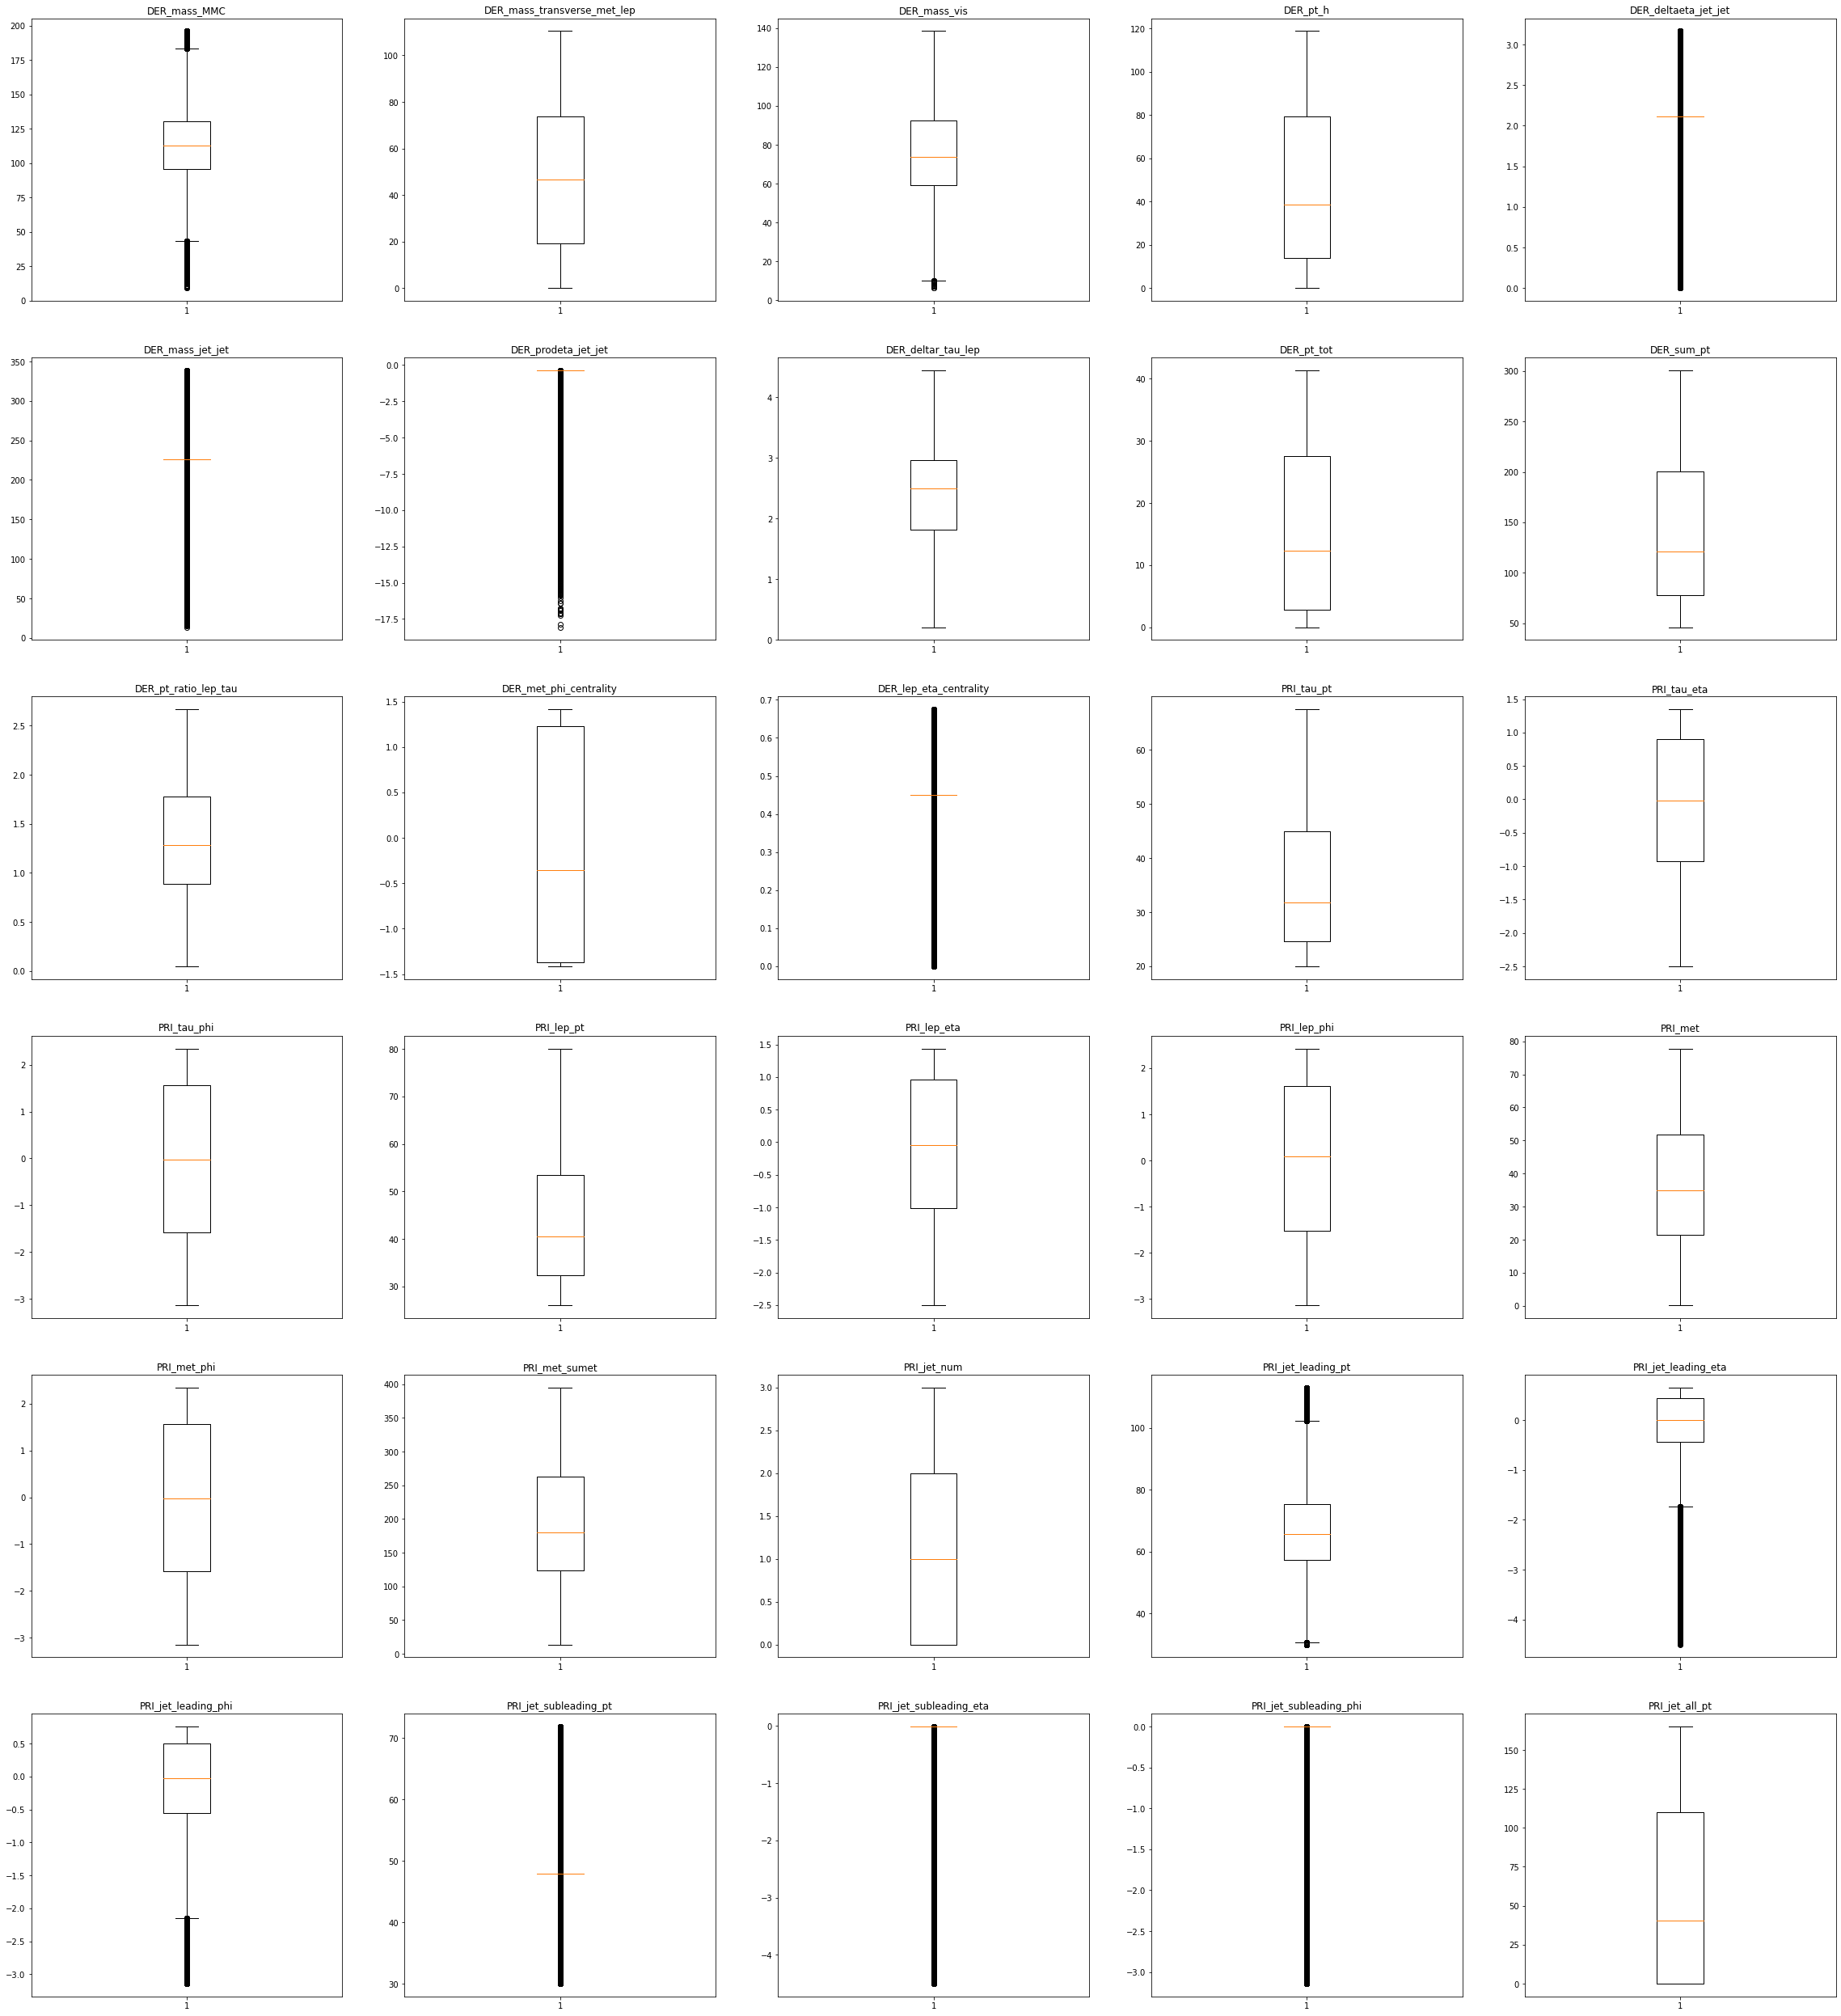

In [91]:
fig, axs = plt.subplots(6, 5, figsize=(40,45))
axs = axs.flatten()

color_map = plt.cm.rainbow(np.linspace(0, 1, x_train.shape[1]))
for i, variable in enumerate(x_train.T):
   axs[i].boxplot(variable)
   axs[i].set_title(features[i])